#Estudo de Caso: Desempenho de Algoritmos de Aprendizado de Máquinas

#Algoritmos KNN e Random Forest. Melhor cenário

## Descrição da Base de Dados utilizada no estudo

### Classificação de Cogumelos [link](https://www.kaggle.com/datasets/uciml/mushroom-classification)

Rótulos por colunas

class – Classe (Alvo)
e: Comestível

p: Venenoso

cap-shape – Formato do Chapéu
b: Sino

c: Cônico

x: Convexo

f: Plano

k: Abaulado

s: Encôncavo

cap-surface – Superfície do Chapéu
f: Fibroso

g: Sulcado

y: Escamoso

s: Suave

cap-color – Cor do Chapéu
n: Marrom

b: Bege

c: Canela

g: Cinza

r: Verde

p: Rosa

u: Roxo

e: Vermelho

w: Branco

y: Amarelo

bruises – Machucado
t: Sim

f: Não

odor – Odor
a: Amêndoa

l: Anis

c: Creosoto

y: Peixe

f: Fétido

m: Mofo

n: Nenhum

p: Pungente

s: Picante

gill-attachment – Inserção das Lâminas
a: Anexada

d: Descendente

f: Livre

n: Não anexada

gill-spacing – Espaçamento das Lâminas
c: Fechado

w: Largura

d: Distante

gill-size – Tamanho das Lâminas
b: Largo

n: Estreito

gill-color – Cor das Lâminas
k: Preto

n: Marrom

b: Bege

h: Chocolate

g: Cinza

r: Verde

o: Laranja

p: Rosa

u: Roxo

e: Vermelho

w: Branco

y: Amarelo

stalk-shape – Formato do Talo
e: Alargado

t: Afilado

stalk-root – Raiz do Talo
b: Bulboso

c: Club

u: Copo

e: Igual

z: Rizomorfo

r: Raiz

?: Desconhecido

stalk-surface-above-ring – Superfície do Talo Acima do Anel
f: Fibroso

y: Escamoso

k: Sedoso

s: Suave

stalk-surface-below-ring – Superfície do Talo Abaixo do Anel
f: Fibroso

y: Escamoso

k: Sedoso

s: Suave

stalk-color-above-ring – Cor do Talo Acima do Anel
n: Marrom

b: Bege

c: Canela

g: Cinza

o: Laranja

p: Rosa

e: Vermelho

w: Branco

y: Amarelo

stalk-color-below-ring – Cor do Talo Abaixo do Anel
n: Marrom

b: Bege

c: Canela

g: Cinza

o: Laranja

p: Rosa

e: Vermelho

w: Branco

y: Amarelo

veil-type – Tipo de Véu
p: Parcial

u: Universal

veil-color – Cor do Véu
n: Marrom

o: Laranja

w: Branco

y: Amarelo

ring-number – Número de Anéis
n: Nenhum

o: Um

t: Dois

ring-type – Tipo de Anel
c: Coberto

e: Evitável

f: Flare

l: Grande

n: Nenhum

p: Pendente

s: Pendurado

z: Zona

spore-print-color – Cor da Impressão de Esporos
k: Preto

n: Marrom

b: Bege

h: Chocolate

r: Verde

o: Laranja

u: Roxo

w: Branco

y: Amarelo

population – População
a: Abundante

c: Agrupado

n: Numeroso

s: Escasso

v: Vários

y: Solitário

habitat – Habitat
g: Grama

l: Folhas

m: Prados

p: Caminhos

u: Urbano

w: Madeira

d: Resíduos



#Melhor cenário para testes

Melhor Cenário — KNN

Codificação: OneHotEncoder

Normalização: Normalizer (ou MinMaxScaler)

PCA: Redução de dimensionalidade para melhorar performance

Balanceamento: Se houver desequilíbrio, aplicar SMOTE

K ótimo: Ajustado com GridSearchCV

Justificativa:

KNN depende de distâncias. OneHot evita que uma categoria tenha mais peso que outra. Normalização é essencial. PCA ajuda a evitar overfitting e reduzir custo computacional.


Melhor Cenário — RF

Codificação: OneHotEncoder ou LabelEncoder

Balanceamento: SMOTE

PCA: Usado para aumentar a eficiência


Justificativa:

Random Forest lida bem com dados categóricos codificados com LabelEncoder (sem criar milhares de colunas). Pode-se usar OneHot se o modelo não ficar pesado. Balanceamento melhora ainda mais.



## Importando os pacote necessários

In [ ]:
# Importando os pacotes que serão utilizados

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Configurando o pandas para exibir todas as colunas e linhas do df
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Configurando a exibição dos dados numéricos para 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

warnings.filterwarnings("ignore")

## Carregando a Base de Dados
## Análise exploratória

In [ ]:
# Carregando o arquivo CSV

base = pd.read_csv('mushrooms.csv')

### Visualizando algumas informações da base

In [ ]:
# Verificando as primeiras linhas do DataFrame

base.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Verificando as dimensões do arquivo.

base.shape

(8124, 23)

In [ ]:
# Verificando informações do arquivo
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
# Verificando se há valores nulos (dados missing)

base.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [ ]:
# Total de valores únicos de cada variável

valores_unicos = []
for i in base.columns[0:12].tolist():
    print(i, ':', len(base[i].astype(str).value_counts()))
    valores_unicos.append(len(base[i].astype(str).value_counts()))

class : 2
cap-shape : 6
cap-surface : 4
cap-color : 10
bruises : 2
odor : 9
gill-attachment : 2
gill-spacing : 2
gill-size : 2
gill-color : 12
stalk-shape : 2
stalk-root : 5


In [ ]:
# Visualizando algumas medidas estatisticas.

base.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [ ]:
# Quantidade de observações por Classe
base.groupby(['class']).size()

,0
class,
e,4208
p,3916


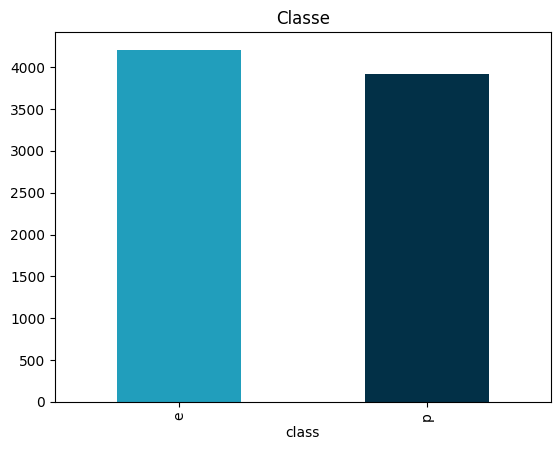

In [ ]:
# Visualizando através do gráfico
base['class'].value_counts().plot(kind='bar', title='Classe',color = ['#219ebc', '#023047']);

In [ ]:
# Quantidade de observações por Classe
base.groupby(['odor']).size()

,0
odor,
a,400
c,192
f,2160
l,400
m,36
n,3528
p,256
s,576
y,576


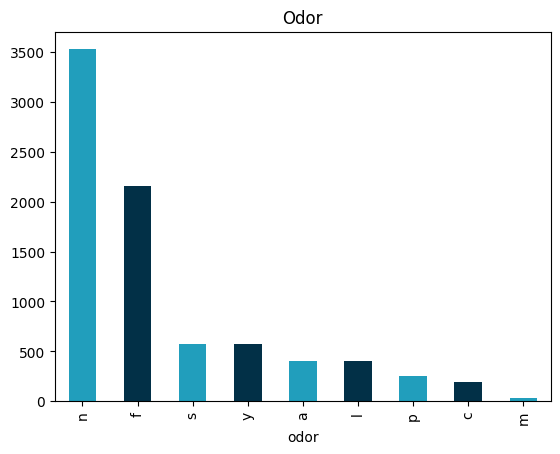

In [ ]:
# Visualizando através do gráfico
base['odor'].value_counts().plot(kind='bar', title='Odor',color = ['#219ebc', '#023047']);

## Analisando algumas das variáveis em relação ao alvo

In [ ]:
# Formatando o tamanho do plot
plt.rcParams["figure.figsize"] = [8.00, 4.00]
plt.rcParams["figure.autolayout"] = True

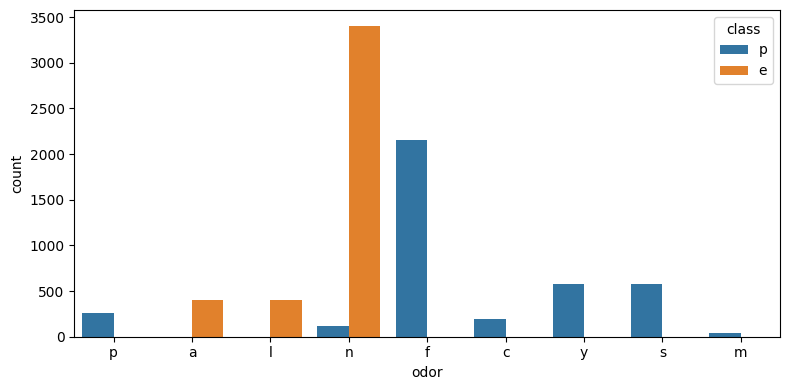

In [ ]:
# Visualizando a Variável Odor x Class

sns.countplot(data = base, x = "odor", hue = "class")
plt.show()

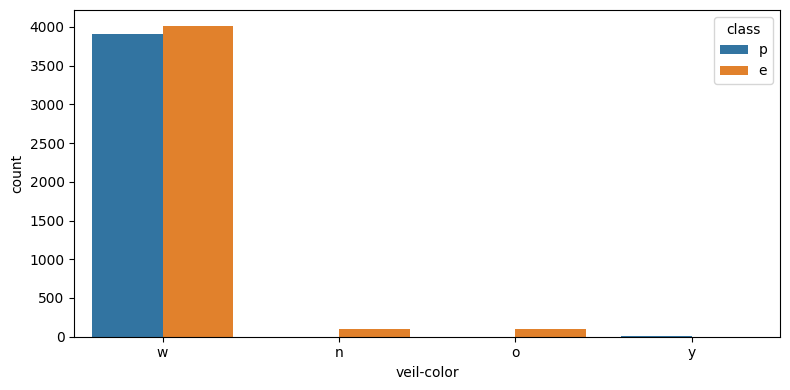

In [ ]:
# Visualizando a Cor do Véu x Class

sns.countplot(data = base, x = "veil-color", hue = "class")
plt.show()

In [ ]:
# Quantidade de observações por Classe
base.groupby(['stalk-root']).size()

,0
stalk-root,
?,2480
b,3776
c,556
e,1120
r,192


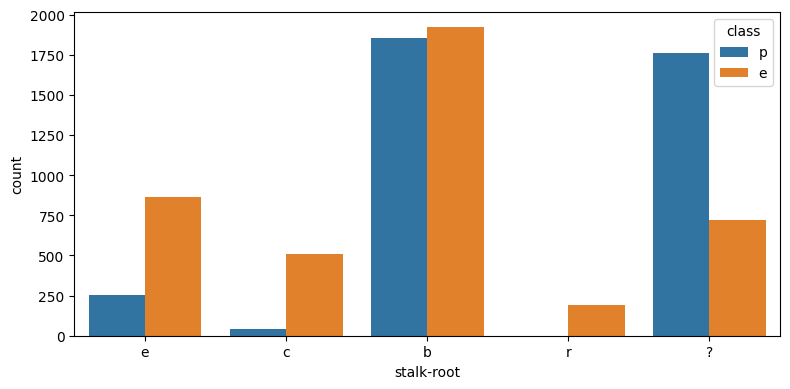

In [ ]:
# Visualizando a Raíz do talo x Class

sns.countplot(data = base, x = "stalk-root", hue = "class")
plt.show()

In [ ]:
# Contar quantos valores indefinidos (representados por '?') existem na coluna 'stalk-root'
undefined_count = (base['stalk-root'] == '?').sum()
undefined_count

np.int64(2480)

## Separando as Variáveis Alvo (target) e Atributos (features)

In [ ]:
# Etapa 2: Separar o alvo (classe) e os atributos
X = base.drop('class', axis=1)
y = base['class'].map({'e': 0, 'p': 1})  # Codificar o alvo como 0 (comestível), 1 (venenoso)

In [ ]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
y.head()

,class
0,1
1,0
2,0
3,1
4,0


## Tratamento de Variáveis Categóricas

In [ ]:
# One-Hot Encoding (incluindo o valor '?' como categoria) configura-se como melhor opção para SVM
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = ohe.fit_transform(X)

X_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Normalização

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
pca_fit = pca.fit(X_encoded)

In [ ]:
# Normalização dos dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

X_scaled

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Divisão em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Exibir as dimensões dos conjuntos resultantes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 117), (1625, 117), (6499,), (1625,))

## Balanceamento

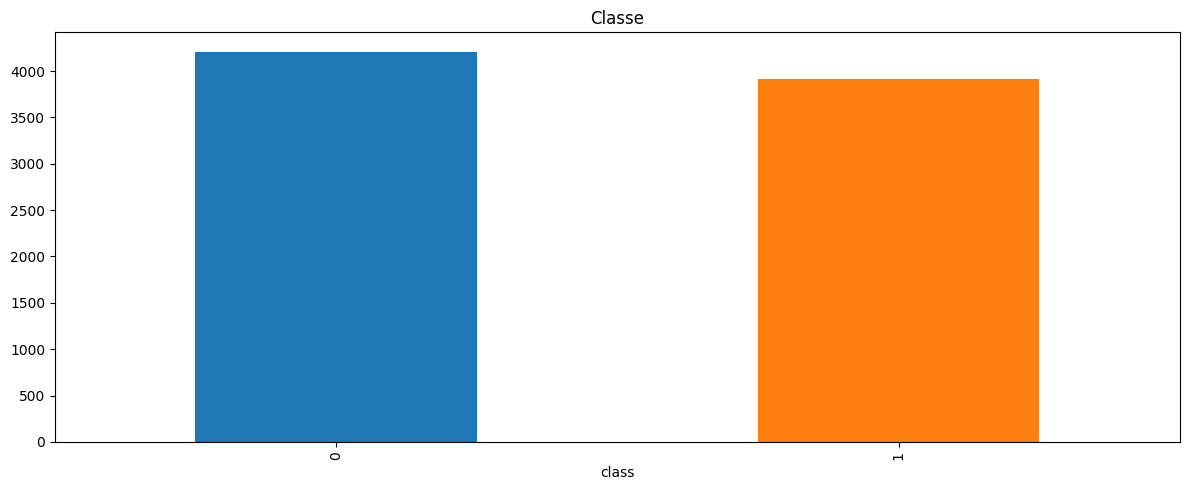

In [ ]:
# Visualizando a variável algo antes do balanceamento
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y.value_counts().plot(kind='bar', title='Classe',color = ['#1F77B4', '#FF7F0E']);

In [ ]:
# Aplicar o SMOTE para balancear as classes no conjunto de treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verificar a nova distribuição das classes após SMOTE
y_train_smote.value_counts()

,count
class,
1,3365
0,3365


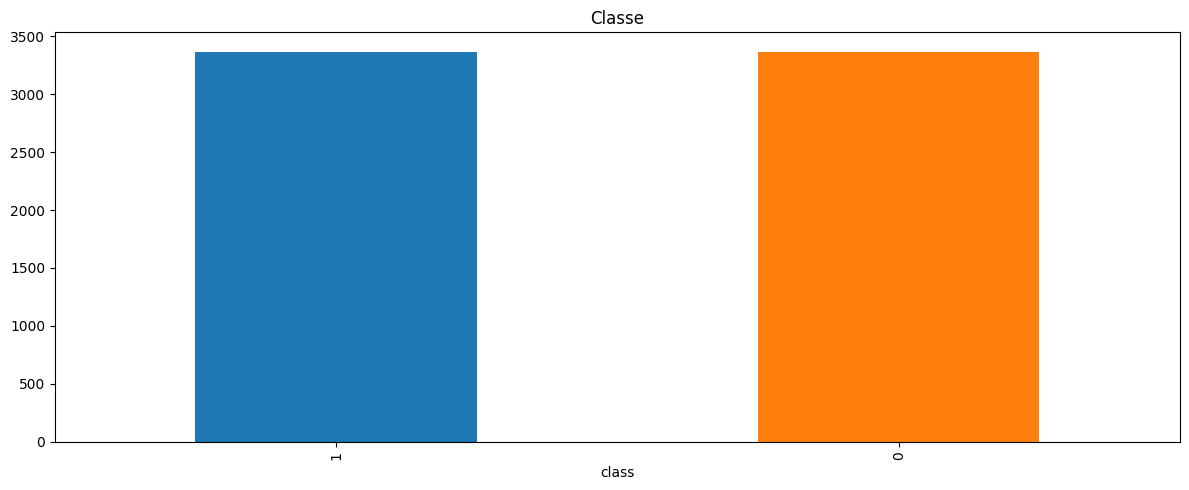

In [ ]:
# Visualizando a variável algo após do balanceamento
plt.rcParams["figure.figsize"] = [12.00, 5.00]
plt.rcParams["figure.autolayout"] = True
y_train_smote.value_counts().plot(kind='bar', title='Classe',color = ['#1F77B4', '#FF7F0E']);

# Implementação do KNN

In [ ]:
# Definindo os valores de k que queremos testar
param_grid = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train_smote, y_train_smote)


print("Melhor valor de k encontrado:", grid_search.best_params_)

print("Melhor acurácia (no treino):", grid_search.best_score_)

# Treinando o modelo final com o melhor k usando o conjunto de treino balanceado
best_k = grid_search.best_params_['n_neighbors']
knn_best = KNeighborsClassifier(n_neighbors=best_k)
# Corrigido: Treinando o modelo final com os dados de treino balanceados
knn_best.fit(X_train_smote, y_train_smote)

X_test_scaled = scaler.transform(X_test)

# Previsões no conjunto de teste
y_pred_best = knn_best.predict(X_test_scaled)

# Avaliação final no conjunto de teste
print("Acurácia final (no teste) com melhor k:", accuracy_score(y_test, y_pred_best))
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred_best))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhor valor de k encontrado: {'n_neighbors': 1}
Melhor acurácia (no treino): 1.0
Acurácia final (no teste) com melhor k: 1.0
Matriz de confusão:
[[843   0]
 [  0 782]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [ ]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test_scaled)

# Avaliação
print("Avaliação do Random Forest:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de confusão:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

Avaliação do Random Forest:
Acurácia: 1.0

Matriz de confusão:
[[843   0]
 [  0 782]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



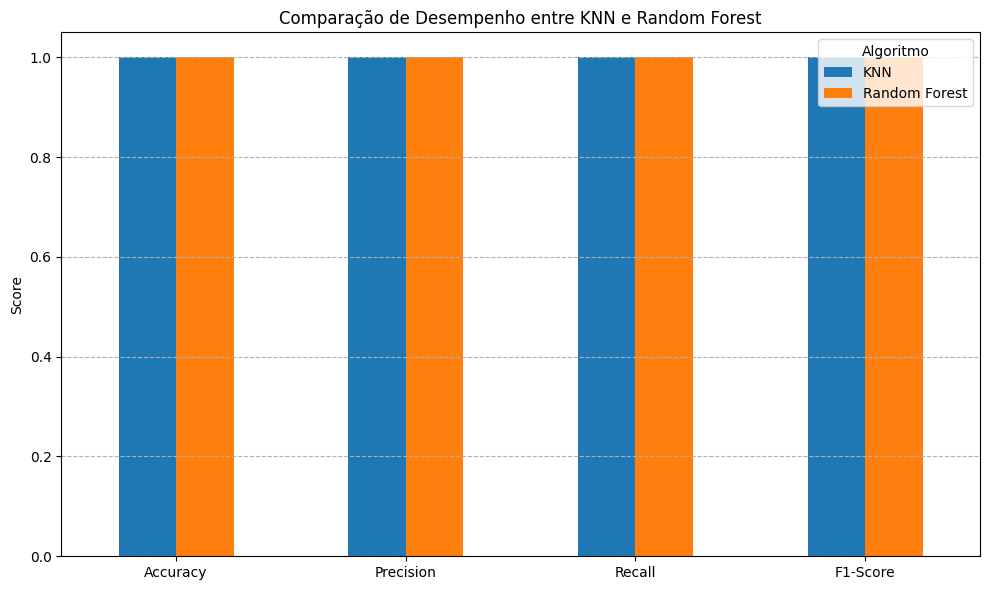

In [ ]:
# Armazenando as métricas para visualização
metrics = {
    'Algorithm': ['KNN', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, y_pred_best), accuracy_score(y_test, y_pred_rf)],
    'Precision': [precision_score(y_test, y_pred_best), precision_score(y_test, y_pred_rf)],
    'Recall': [recall_score(y_test, y_pred_best), recall_score(y_test, y_pred_rf)],
    'F1-Score': [f1_score(y_test, y_pred_best), f1_score(y_test, y_pred_rf)]
}

metrics_df = pd.DataFrame(metrics)

# Visualização do desempenho dos algoritmos
metrics_df.set_index('Algorithm').T.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação de Desempenho entre KNN e Random Forest')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Algoritmo')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()